In [1]:
import pandas as pd
import numpy as np

Reading the file

In [2]:
df = pd.read_csv("gender_submission.csv")

Understand data set

In [3]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [4]:
print(df.isnull().sum())

PassengerId    0
Survived       0
dtype: int64


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


Since no missing values are present, you can skip this step for now. However, if missing values do appear in a different dataset or during preprocessing, use methods like .fillna() or .dropna().

Identify and Handle Outliers

Since both columns are integers, you might want to check for outliers in the PassengerId or Survived column. Here’s how:

Visualize the Data

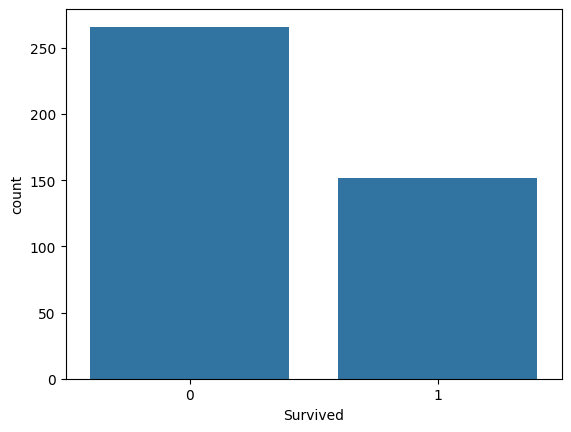

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Survived' values
sns.countplot(x=df['Survived'])
plt.show()

The result shows an empty DataFrame which means there are no outliers in the PassengerId column based on the IQR method. This outcome is expected for a column like PassengerId, as it typically consists of unique sequential identifiers, which inherently lack statistical outliers.

In [7]:
Q1 = df['PassengerId'].quantile(0.25)
Q3 = df['PassengerId'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['PassengerId'] < lower_bound) | (df['PassengerId'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [PassengerId, Survived]
Index: []


The Survived column is binary (0 or 1), so no outliers are possible.